In [36]:
name = "Lara Ayumi Nagamatsu & Lucy Anne de Omena Evangelista"  # write YOUR NAME

honorPledge = "I affirm that I have not given or received any unauthorized " \
              "help on this assignment, and that this work is my own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)



Name:  Lara Ayumi Nagamatsu & Lucy Anne de Omena Evangelista

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.



# Imports e carregamento de dados

In [2]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import pipeline, metrics

import warnings
import random

%matplotlib inline
# Ignorando warnings
warnings.filterwarnings('ignore')

In [3]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

print("\nTamanho dos conjuntos de dados:")
print(X_train_ori.shape, y_train_ori.shape)
print(X_test_ori.shape, y_test_ori.shape,"\n")


Tamanho dos conjuntos de dados:
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,) 



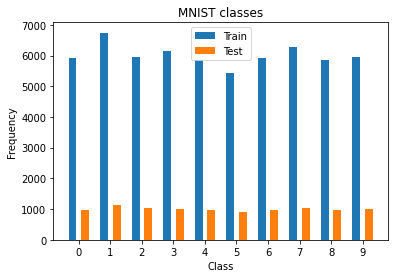

In [4]:
labels = ["%s"%i for i in range(10)]

unique, counts = np.unique(y_train_ori, return_counts=True)
uniquet, countst = np.unique(y_test_ori, return_counts=True)

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(unique + 0.2, countst, 0.25, label='Test')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('MNIST classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

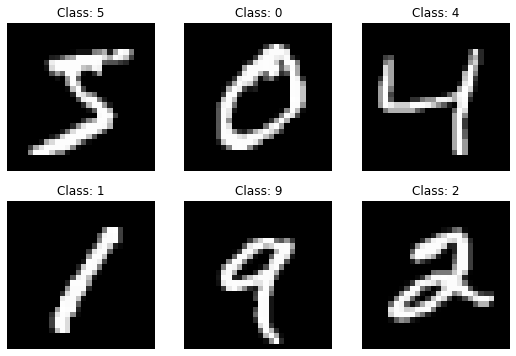

In [5]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train_ori[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

# Tratamento inicial

In [6]:
# Reduce the image size to its half 
X_train = np.array([image[::2, 1::2] for image in X_train_ori])
X_test  = np.array([image[::2, 1::2] for image in X_test_ori])

y_train = y_train_ori
y_test = y_test_ori

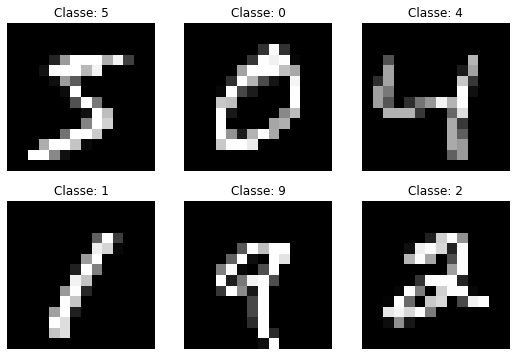

In [7]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Classe: %d"%y_train_ori[i])
    
plt.show()

In [8]:
X_train = (X_train/255.0).astype('float32').reshape((60000,14*14))
X_test = (X_test/255.0).astype('float32').reshape((10000,14*14))

print(f"Tipo dos dados:\nX_train: {X_train.dtype}\nX_test: {X_test.dtype}")

print("\nFormato de X_train: ", X_train.shape)
print("Formato de X_test: ", X_test.shape)

print("\nValor mínimo em X_train:", np.amin(X_train))
print("Valor máximo em X_train:", np.amax(X_train))

print("\nValor mínimo em X_test:", np.amin(X_test))
print("Valor máximo em X_test:", np.amax(X_test))


Tipo dos dados:
X_train: float32
X_test: float32

Formato de X_train:  (60000, 196)
Formato de X_test:  (10000, 196)

Valor mínimo em X_train: 0.0
Valor máximo em X_train: 1.0

Valor mínimo em X_test: 0.0
Valor máximo em X_test: 1.0


# Início do EP4
## Separação dos Datasets

Os datasets devem ser separados em $D_{val}$, $D_{train}$ e $D_{test}$; $D_{train}$ será composto por 70% do training set e $D_{val}$ será composto pelos restantes 30%.

In [9]:
#escolher 42000 índices aleatórios diferentes e 

random.seed(333)
train_ind = random.sample(range(0, 60000), 42000)      # 70%
val_ind = list(set(range(0, 60000)) - set(train_ind))  # 30%
print("\nTamanho de train_ind: ", len(train_ind))
print("Tamanho de val_ind: ", len(val_ind))

# INICIALIZANDO
D_train = np.array([ [ None for y in range(196) ] for x in range(42000) ])
D_val = np.array([ [ None for y in range(196) ] for x in range(18000) ])

x = 0
for i in train_ind:
    row = X_train[i]
    D_train[x][:] = [v for v in row]
    x = x + 1

D_train = np.array(D_train)

x = 0
for i in val_ind:
    row = X_train[i]
    D_val[x][:] = [v for v in row]
    x = x + 1

D_val = np.array(D_val)

# ASSOCIAR OS Y'S com os novos indices!!!
D_y_train = [y_train[i] for i in train_ind]
D_y_val = [y_train[i] for i in val_ind]

print("\nFormato de D_train: ", D_train.shape)
print("Formato de D_val: ", D_val.shape)

# ou usar
#train_data, test_data = sklearn.model_selection.train_test_split(original_data, train_size = 0.7,random_state=4278)

#You must partition the original training set into 70% training (D train ) and 30% validation (D val )
#sets, in a stratified way. Make sure to include code to verify that the generated partition is indeed
#stratified.


Tamanho de train_ind:  42000
Tamanho de val_ind:  18000

Formato de D_train:  (42000, 196)
Formato de D_val:  (18000, 196)


Exibindo conteúdo de uma amostra:

In [10]:
D_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37254903, 0.0, 0.0,
       0.0, 0.36078432, 0.7764706, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.5137255, 0.99607843, 0.99607843, 0.99607843, 0.7372549,
       0.7372549, 0.99607843, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.9137255, 0.40784314, 0.0, 0.23137255, 0.70980394, 0.22352941,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23529412, 0.7882353, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21960784,
       0.99607843, 0.3529412, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.26666668, 0.0, 0.0, 0.23529412, 0.99607843, 0.9843137, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8117647, 0.0, 0.0, 0.0, 0.18039216,
       0.99607843, 0.101960786, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8,

# Treinando o algoritmo de aprendizagem e selecionando modelos
Usamos agora o conjunto $D_{train}$ para treinar os algoritmos de aprendizagem sob parâmetros diferentes.

## Divisão do $D_{train}$ para escolha de melhores hiperparametros

Há necessidade de se separar os dados de $D_{train}$ para se testar os modelos com melhores hiperparametros. A escolha foi dada por $\frac{1}{5}$ da quantidade de dados de $D_{train}$.

In [11]:
# 4/5 dos parâmetros
train_hp = D_train[:33600].copy()
train_hp_y = D_y_train[:33600].copy()

# 1/5 dos parâmetros, resultados de predição
test_hp  = D_train[33600:42000].copy()
test_hp_y = D_y_train[33600:42000].copy()

print("Formato de train_hp: ", train_hp.shape)
print("Formato de train_hp_y: ", len(train_hp_y))
print("Formato de test_hp:  ", test_hp.shape)
print("Formato de test_hp_y:  ", len(test_hp_y))

Formato de train_hp:  (33600, 196)
Formato de train_hp_y:  33600
Formato de test_hp:   (8400, 196)
Formato de test_hp_y:   8400


## Regressão Logística

### Sem otimização

Foi necessário aumentar a quantidade de iterações para o modelo convergir. O valor padrão era 100, e agora é 400.

In [12]:
%%time
#https://www.mygreatlearning.com/blog/gridsearchcv/
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print("Parâmetros base:")

logreg = LogisticRegression(max_iter=400)
# atributos interessantes: tol, class_weight, max_iter, C
pprint(logreg.get_params()) # imprime os hiperparametros!

logreg.fit(train_hp, train_hp_y)
predictions = logreg.predict(test_hp) 
print('\nRelatório de classificação:\n',classification_report(test_hp_y, predictions)) 

#logreg.fit(D_train, D_y_train)
#predictions = logreg.predict(D_val) 
#print(classification_report(D_y_val, predictions)) 

Parâmetros base:
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 400,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       858
           1       0.93      0.96      0.95       930
           2       0.89      0.89      0.89       833
           3       0.89      0.88      0.89       868
           4       0.92      0.91      0.92       812
           5       0.89      0.86      0.88       761
           6       0.94      0.95      0.95       797
           7       0.93      0.92      0.93       899
           8       0.88      0.87      0.87       807
           9       0.88      0.90      0.89       835

    accuracy                           0.91      8400
   macro avg

### Com otimização

In [13]:
%%time
#https://scikit-learn.org/stable/modules/grid_search.html
#https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406

# Teste com otimização de hiperparâmetros
param_grid = {'C': [0.1, 1, 10], 
              'max_iter': [500, 750, 1000], 
              'tol': [1e-4, 1e-2, 1e-1]
              } 

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True)
#grid = RandomizedSearchCV(LogisticRegression(), param_grid) 
grid.fit(train_hp, train_hp_y)

print("\nMelhores parâmetros com a otimização:")
pprint(grid.best_params_) 

grid_predictions = grid.predict(test_hp)
print('\nRelatório de classificação:\n', classification_report(test_hp_y, grid_predictions))


Melhores parâmetros com a otimização:
{'C': 10, 'max_iter': 750, 'tol': 0.0001}

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       858
           1       0.94      0.96      0.95       930
           2       0.89      0.89      0.89       833
           3       0.89      0.89      0.89       868
           4       0.92      0.91      0.91       812
           5       0.89      0.87      0.88       761
           6       0.94      0.95      0.94       797
           7       0.93      0.92      0.93       899
           8       0.88      0.87      0.88       807
           9       0.89      0.90      0.89       835

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

CPU times: user 2h 32min 30s, sys: 2h 14min 58s, total: 4h 47min 29s
Wall time: 36min 28s


In [14]:
print(f"Com os testes realizados, a melhor combinação é dada por {grid.best_params_}")

Com os testes realizados, a melhor combinação é dada por {'C': 10, 'max_iter': 750, 'tol': 0.0001}


## Redes Neurais

### Sem otimização

In [15]:
%%time
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
print("Parâmetros base:")


neuralnet = MLPClassifier(max_iter=300) # tive de aumentar o max_iter para convergir...
# atributos interessantes: tol, class_weight, max_iter, C
pprint(neuralnet.get_params()) # imprime os hiperparametros!

neuralnet.fit(train_hp, train_hp_y)
print("\nScore do modelo: ",neuralnet.score(train_hp, train_hp_y))

predictions = neuralnet.predict(test_hp) 
print(classification_report(test_hp_y, predictions)) 

#neuralnet.fit(D_train, D_y_train)
#neuralnet.score(D_train, D_y_train)
#predictions = neuralnet.predict(D_val) 
#print(classification_report(D_y_val, predictions)) 

Parâmetros base:
{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Score do modelo:  1.0
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       858
           1       0.98      0.98      0.98       930
           2       0.95      0.96      0.95       833
           3       0.97      0.95      0.96       868
           4       0.98      0.97      0.97       812
           5       0.96      0.97      0.97       761
           6       0.98      0.98      0.98       797
           7       0.

### Com otimização

<font color='red'>Aviso: </font> Demora bastante para rodar! Cerca de 3 horas

In [16]:
%%time
#https://scikit-learn.org/stable/modules/grid_search.html

# Teste com otimização de hiperparâmetros
param_grid = {'early_stopping': [True, False],  #MUDAR HIPERPARAMETROS...
              'activation': ['relu', 'logistic', 'tanh', 'identity'],
              'max_iter': [500, 750, 1000], 
              'tol': [1e-4, 1e-2, 1e-1]
              } 

grid = GridSearchCV(MLPClassifier(), param_grid, refit=True,  verbose = 5) 
grid.fit(train_hp, train_hp_y)

print("\nMelhores parâmetros com a otimização:")
pprint(grid.best_params_) 

grid_predictions = grid.predict(test_hp)
print('\nRelatório de classificação:\n',classification_report(test_hp_y, grid_predictions))

#grid.fit(D_train, D_y_train)
#print(grid.best_params_) 
#grid_predictions = grid.predict(D_val)
#print(classification_report(D_y_val, grid_predictions))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END activation=relu, early_stopping=True, max_iter=500, tol=0.0001;, score=0.966 total time=  17.8s
[CV 2/5] END activation=relu, early_stopping=True, max_iter=500, tol=0.0001;, score=0.961 total time=  12.5s
[CV 3/5] END activation=relu, early_stopping=True, max_iter=500, tol=0.0001;, score=0.961 total time=  15.5s
[CV 4/5] END activation=relu, early_stopping=True, max_iter=500, tol=0.0001;, score=0.963 total time=  12.6s
[CV 5/5] END activation=relu, early_stopping=True, max_iter=500, tol=0.0001;, score=0.963 total time=  16.2s
[CV 1/5] END activation=relu, early_stopping=True, max_iter=500, tol=0.01;, score=0.946 total time=   3.8s
[CV 2/5] END activation=relu, early_stopping=True, max_iter=500, tol=0.01;, score=0.942 total time=   3.8s
[CV 3/5] END activation=relu, early_stopping=True, max_iter=500, tol=0.01;, score=0.941 total time=   3.5s
[CV 4/5] END activation=relu, early_stopping=True, max_iter=500, tol=0.0

[CV 2/5] END activation=relu, early_stopping=False, max_iter=1000, tol=0.0001;, score=0.965 total time=  39.4s
[CV 3/5] END activation=relu, early_stopping=False, max_iter=1000, tol=0.0001;, score=0.961 total time=  41.8s
[CV 4/5] END activation=relu, early_stopping=False, max_iter=1000, tol=0.0001;, score=0.965 total time=  40.9s
[CV 5/5] END activation=relu, early_stopping=False, max_iter=1000, tol=0.0001;, score=0.965 total time=  37.3s
[CV 1/5] END activation=relu, early_stopping=False, max_iter=1000, tol=0.01;, score=0.955 total time=   6.5s
[CV 2/5] END activation=relu, early_stopping=False, max_iter=1000, tol=0.01;, score=0.957 total time=   6.6s
[CV 3/5] END activation=relu, early_stopping=False, max_iter=1000, tol=0.01;, score=0.956 total time=   6.5s
[CV 4/5] END activation=relu, early_stopping=False, max_iter=1000, tol=0.01;, score=0.959 total time=   6.5s
[CV 5/5] END activation=relu, early_stopping=False, max_iter=1000, tol=0.01;, score=0.957 total time=   6.8s
[CV 1/5] EN

[CV 1/5] END activation=logistic, early_stopping=False, max_iter=750, tol=0.0001;, score=0.963 total time= 1.3min
[CV 2/5] END activation=logistic, early_stopping=False, max_iter=750, tol=0.0001;, score=0.967 total time= 1.2min
[CV 3/5] END activation=logistic, early_stopping=False, max_iter=750, tol=0.0001;, score=0.966 total time= 1.3min
[CV 4/5] END activation=logistic, early_stopping=False, max_iter=750, tol=0.0001;, score=0.968 total time= 1.3min
[CV 5/5] END activation=logistic, early_stopping=False, max_iter=750, tol=0.0001;, score=0.964 total time= 1.2min
[CV 1/5] END activation=logistic, early_stopping=False, max_iter=750, tol=0.01;, score=0.925 total time=   6.7s
[CV 2/5] END activation=logistic, early_stopping=False, max_iter=750, tol=0.01;, score=0.930 total time=   7.5s
[CV 3/5] END activation=logistic, early_stopping=False, max_iter=750, tol=0.01;, score=0.934 total time=   7.1s
[CV 4/5] END activation=logistic, early_stopping=False, max_iter=750, tol=0.01;, score=0.927 t

[CV 1/5] END activation=tanh, early_stopping=False, max_iter=500, tol=0.0001;, score=0.965 total time=  58.7s
[CV 2/5] END activation=tanh, early_stopping=False, max_iter=500, tol=0.0001;, score=0.965 total time=  55.1s
[CV 3/5] END activation=tanh, early_stopping=False, max_iter=500, tol=0.0001;, score=0.963 total time=  55.0s
[CV 4/5] END activation=tanh, early_stopping=False, max_iter=500, tol=0.0001;, score=0.965 total time=  57.8s
[CV 5/5] END activation=tanh, early_stopping=False, max_iter=500, tol=0.0001;, score=0.967 total time=  53.7s
[CV 1/5] END activation=tanh, early_stopping=False, max_iter=500, tol=0.01;, score=0.951 total time=   9.4s
[CV 2/5] END activation=tanh, early_stopping=False, max_iter=500, tol=0.01;, score=0.949 total time=   9.4s
[CV 3/5] END activation=tanh, early_stopping=False, max_iter=500, tol=0.01;, score=0.951 total time=   9.8s
[CV 4/5] END activation=tanh, early_stopping=False, max_iter=500, tol=0.01;, score=0.952 total time=   9.0s
[CV 5/5] END activ

[CV 1/5] END activation=identity, early_stopping=True, max_iter=1000, tol=0.0001;, score=0.909 total time=   7.1s
[CV 2/5] END activation=identity, early_stopping=True, max_iter=1000, tol=0.0001;, score=0.908 total time=   5.1s
[CV 3/5] END activation=identity, early_stopping=True, max_iter=1000, tol=0.0001;, score=0.906 total time=   5.5s
[CV 4/5] END activation=identity, early_stopping=True, max_iter=1000, tol=0.0001;, score=0.907 total time=   7.9s
[CV 5/5] END activation=identity, early_stopping=True, max_iter=1000, tol=0.0001;, score=0.909 total time=   5.1s
[CV 1/5] END activation=identity, early_stopping=True, max_iter=1000, tol=0.01;, score=0.907 total time=   3.0s
[CV 2/5] END activation=identity, early_stopping=True, max_iter=1000, tol=0.01;, score=0.908 total time=   3.0s
[CV 3/5] END activation=identity, early_stopping=True, max_iter=1000, tol=0.01;, score=0.906 total time=   3.0s
[CV 4/5] END activation=identity, early_stopping=True, max_iter=1000, tol=0.01;, score=0.903 t

In [17]:
print(f"Com os testes realizados, a melhor combinação é dada por \n{grid.best_params_}")

Com os testes realizados, a melhor combinação é dada por {'activation': 'logistic', 'early_stopping': False, 'max_iter': 500, 'tol': 0.0001}


## Support Vector Machines

### Sem otimização

In [18]:
%%time
#https://scikit-learn.org/stable/modules/svm.html#svm-classification
#warnings.filterwarnings('default')

print("Parâmetros base:")
supervm = make_pipeline(StandardScaler(), SVC())
#data_scaled = std.transform(train_hp)
#supervm = SVC(max_iter=300) # tive de aumentar o max_iter para convergir...
# atributos interessantes: tol, class_weight, max_iter, C
#supervm.fit(D_train, D_y_train)
pprint(supervm.get_params())

supervm.fit(train_hp, train_hp_y)
print("\nScore do modelo: ", supervm.score(train_hp, train_hp_y))

predictions = supervm.predict(test_hp) 
print('\nRelatório de classificação:\n',classification_report(test_hp_y, predictions)) 


Parâmetros base:
{'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'svc': SVC(),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False,
 'verbose': False}

Score do modelo:  0.9799107142857143

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       858
           1       0.96      0.98      0.97       930
           2       0.91      0.96      0.94       833
           3       0.95      0.95      0.95       868
           4       

### Com otimização

<font color='red'>Aviso: </font> Demora bastante para rodar! Cerca de 9-10 horas

In [19]:
%%time
#https://scikit-learn.org/stable/modules/grid_search.html
#grid = GridSearchCV( n_jobs=1, param_grid=param_grid)

#warnings.filterwarnings('default')

print(SVC().get_params().keys()) # imprime os hiperparametros!


# Teste com otimização de hiperparâmetros
params = {'svm__C': [0.1, 1, 10],  #MUDAR HIPERPARAMETROS...
          'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'svm__decision_function_shape': ['ovo', 'ovr'],
          'svm__tol': [1e-4, 1e-2, 1e-1]
          } 

#supervm = make_pipeline(StandardScaler(), SVC())
clf = pipeline.Pipeline([('scl', StandardScaler()),('svm', SVC())])

grid = GridSearchCV(estimator=clf,  param_grid=params, refit=True,  verbose = 5) 
grid.fit(train_hp, train_hp_y)

print("\nMelhores parâmetros com a otimização:")
print(grid.best_params_) 

grid_predictions = grid.predict(test_hp)
print('\nRelatório de classificação:\n',classification_report(test_hp_y, grid_predictions))


dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END svm__C=0.1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.0001;, score=0.927 total time=  20.9s
[CV 2/5] END svm__C=0.1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.0001;, score=0.924 total time=  20.9s
[CV 3/5] END svm__C=0.1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.0001;, score=0.925 total time=  20.5s
[CV 4/5] END svm__C=0.1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.0001;, score=0.929 total time=  20.8s
[CV 5/5] END svm__C=0.1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.0001;, score=0.928 total time=  20.8s
[CV 1/5] END svm__C=0.1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.01;, sco

[CV 5/5] END svm__C=0.1, svm__decision_function_shape=ovr, svm__kernel=linear, svm__tol=0.0001;, score=0.928 total time=  20.8s
[CV 1/5] END svm__C=0.1, svm__decision_function_shape=ovr, svm__kernel=linear, svm__tol=0.01;, score=0.928 total time=  20.4s
[CV 2/5] END svm__C=0.1, svm__decision_function_shape=ovr, svm__kernel=linear, svm__tol=0.01;, score=0.924 total time=  20.4s
[CV 3/5] END svm__C=0.1, svm__decision_function_shape=ovr, svm__kernel=linear, svm__tol=0.01;, score=0.925 total time=  20.2s
[CV 4/5] END svm__C=0.1, svm__decision_function_shape=ovr, svm__kernel=linear, svm__tol=0.01;, score=0.930 total time=  20.4s
[CV 5/5] END svm__C=0.1, svm__decision_function_shape=ovr, svm__kernel=linear, svm__tol=0.01;, score=0.928 total time=  20.6s
[CV 1/5] END svm__C=0.1, svm__decision_function_shape=ovr, svm__kernel=linear, svm__tol=0.1;, score=0.927 total time=  20.3s
[CV 2/5] END svm__C=0.1, svm__decision_function_shape=ovr, svm__kernel=linear, svm__tol=0.1;, score=0.924 total time=

[CV 1/5] END svm__C=1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.1;, score=0.922 total time=  28.2s
[CV 2/5] END svm__C=1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.1;, score=0.922 total time=  28.4s
[CV 3/5] END svm__C=1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.1;, score=0.917 total time=  27.3s
[CV 4/5] END svm__C=1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.1;, score=0.922 total time=  28.0s
[CV 5/5] END svm__C=1, svm__decision_function_shape=ovo, svm__kernel=linear, svm__tol=0.1;, score=0.924 total time=  28.6s
[CV 1/5] END svm__C=1, svm__decision_function_shape=ovo, svm__kernel=poly, svm__tol=0.0001;, score=0.943 total time= 1.4min
[CV 2/5] END svm__C=1, svm__decision_function_shape=ovo, svm__kernel=poly, svm__tol=0.0001;, score=0.940 total time= 1.4min
[CV 3/5] END svm__C=1, svm__decision_function_shape=ovo, svm__kernel=poly, svm__tol=0.0001;, score=0.943 total time= 1.4min
[CV 4/5] END 

[CV 3/5] END svm__C=1, svm__decision_function_shape=ovr, svm__kernel=poly, svm__tol=0.0001;, score=0.943 total time= 1.4min
[CV 4/5] END svm__C=1, svm__decision_function_shape=ovr, svm__kernel=poly, svm__tol=0.0001;, score=0.943 total time= 1.4min
[CV 5/5] END svm__C=1, svm__decision_function_shape=ovr, svm__kernel=poly, svm__tol=0.0001;, score=0.944 total time= 1.4min
[CV 1/5] END svm__C=1, svm__decision_function_shape=ovr, svm__kernel=poly, svm__tol=0.01;, score=0.943 total time= 1.4min
[CV 2/5] END svm__C=1, svm__decision_function_shape=ovr, svm__kernel=poly, svm__tol=0.01;, score=0.940 total time= 1.4min
[CV 3/5] END svm__C=1, svm__decision_function_shape=ovr, svm__kernel=poly, svm__tol=0.01;, score=0.943 total time= 1.4min
[CV 4/5] END svm__C=1, svm__decision_function_shape=ovr, svm__kernel=poly, svm__tol=0.01;, score=0.943 total time= 1.4min
[CV 5/5] END svm__C=1, svm__decision_function_shape=ovr, svm__kernel=poly, svm__tol=0.01;, score=0.944 total time= 1.4min
[CV 1/5] END svm__

[CV 5/5] END svm__C=10, svm__decision_function_shape=ovo, svm__kernel=poly, svm__tol=0.01;, score=0.966 total time=  48.6s
[CV 1/5] END svm__C=10, svm__decision_function_shape=ovo, svm__kernel=poly, svm__tol=0.1;, score=0.965 total time=  48.0s
[CV 2/5] END svm__C=10, svm__decision_function_shape=ovo, svm__kernel=poly, svm__tol=0.1;, score=0.967 total time=  47.9s
[CV 3/5] END svm__C=10, svm__decision_function_shape=ovo, svm__kernel=poly, svm__tol=0.1;, score=0.965 total time=  48.1s
[CV 4/5] END svm__C=10, svm__decision_function_shape=ovo, svm__kernel=poly, svm__tol=0.1;, score=0.969 total time=  47.9s
[CV 5/5] END svm__C=10, svm__decision_function_shape=ovo, svm__kernel=poly, svm__tol=0.1;, score=0.966 total time=  48.3s
[CV 1/5] END svm__C=10, svm__decision_function_shape=ovo, svm__kernel=rbf, svm__tol=0.0001;, score=0.965 total time=  38.8s
[CV 2/5] END svm__C=10, svm__decision_function_shape=ovo, svm__kernel=rbf, svm__tol=0.0001;, score=0.962 total time=  38.7s
[CV 3/5] END svm__C

[CV 1/5] END svm__C=10, svm__decision_function_shape=ovr, svm__kernel=rbf, svm__tol=0.0001;, score=0.965 total time=  39.2s
[CV 2/5] END svm__C=10, svm__decision_function_shape=ovr, svm__kernel=rbf, svm__tol=0.0001;, score=0.962 total time=  38.1s
[CV 3/5] END svm__C=10, svm__decision_function_shape=ovr, svm__kernel=rbf, svm__tol=0.0001;, score=0.964 total time=  38.3s
[CV 4/5] END svm__C=10, svm__decision_function_shape=ovr, svm__kernel=rbf, svm__tol=0.0001;, score=0.966 total time=  38.8s
[CV 5/5] END svm__C=10, svm__decision_function_shape=ovr, svm__kernel=rbf, svm__tol=0.0001;, score=0.961 total time=  38.4s
[CV 1/5] END svm__C=10, svm__decision_function_shape=ovr, svm__kernel=rbf, svm__tol=0.01;, score=0.965 total time=  38.1s
[CV 2/5] END svm__C=10, svm__decision_function_shape=ovr, svm__kernel=rbf, svm__tol=0.01;, score=0.962 total time=  38.2s
[CV 3/5] END svm__C=10, svm__decision_function_shape=ovr, svm__kernel=rbf, svm__tol=0.01;, score=0.964 total time=  37.6s
[CV 4/5] END s

In [20]:
print(f"Os melhores parâmetros são \n{grid.best_params_}")

Os melhores parâmetros são 
{'svm__C': 10, 'svm__decision_function_shape': 'ovo', 'svm__kernel': 'poly', 'svm__tol': 0.0001}


# Validando - Escolha de um modelo final
Checamos a validação das hipóteses com $D_{val}$ para elencar os modelos e escolher o melhor - este é o de melhor score.

## Rodando o teste com $D_{val}$ para Regressão Logística com os melhores parâmetros


Treino e predição do modelo com o conjunto de dados $D_{val}$

In [21]:
%%time

logreg = LogisticRegression(max_iter=750 , C=10 , tol=0.0001)
logreg.fit(D_train, D_y_train)
log_predictions = logreg.predict(D_val) 
print(classification_report(D_y_val, log_predictions)) 


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1805
           1       0.94      0.97      0.95      2009
           2       0.91      0.90      0.90      1785
           3       0.90      0.87      0.89      1884
           4       0.90      0.91      0.91      1722
           5       0.87      0.85      0.86      1594
           6       0.93      0.95      0.94      1759
           7       0.92      0.92      0.92      1878
           8       0.86      0.87      0.86      1750
           9       0.89      0.88      0.88      1814

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

CPU times: user 3min 17s, sys: 2min 44s, total: 6min 2s
Wall time: 45.6 s


In [22]:
wrong = 0
right = 0
inputs = D_val
labels = D_y_val

for input, prediction, label in zip(inputs, log_predictions, labels):
    if prediction != label:
        wrong = wrong + 1
    else:
        right += 1
    
    
print(f"\nO modelo teve {wrong} predições incorretas e {right} predições corretas\n",
      f"Assim, possui precisão de {right/(wrong+right):.2f}%\n")


O modelo teve 1640 predições incorretas e 16360 predições corretas
 Assim, possui precisão de 0.91%



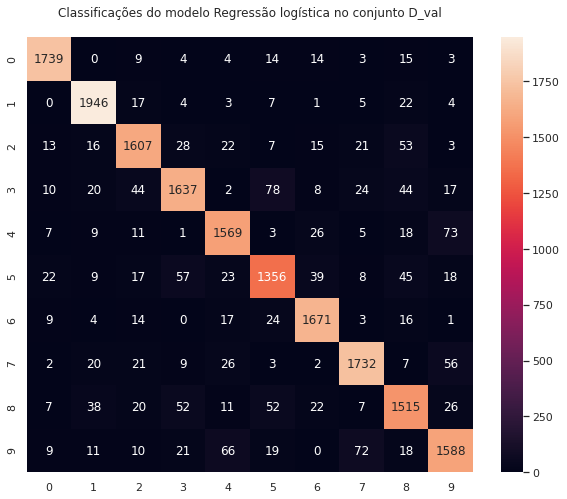

In [23]:
sns.set(rc={'figure.figsize':(10,8)})
plt.title(f"Classificações do modelo Regressão logística no conjunto D_val\n")
sns.heatmap(metrics.confusion_matrix(D_y_val, log_predictions), annot=True, fmt='g')
plt.show()

## Rodando o teste com $D_{val}$ para Redes Neurais com os melhores parâmetros

In [24]:
%%time

neuralnet = MLPClassifier(activation='logistic', max_iter=750, tol=0.0001, early_stopping= False)
neuralnet.get_params() # imprime os hiperparametros!
neuralnet.fit(D_train, D_y_train)
neuralnet.score(D_train, D_y_train)
neural_predictions = neuralnet.predict(D_val) 
print(classification_report(D_y_val, neural_predictions)+'\n') 


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1805
           1       0.99      0.98      0.98      2009
           2       0.97      0.97      0.97      1785
           3       0.96      0.96      0.96      1884
           4       0.96      0.96      0.96      1722
           5       0.96      0.96      0.96      1594
           6       0.98      0.98      0.98      1759
           7       0.97      0.98      0.97      1878
           8       0.95      0.96      0.95      1750
           9       0.96      0.96      0.96      1814

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000


CPU times: user 5min 7s, sys: 9min 42s, total: 14min 49s
Wall time: 1min 51s


In [25]:
wrong = 0
right = 0
inputs = D_val
labels = D_y_val
for input, prediction, label in zip(inputs, neural_predictions, labels):
    if prediction != label:
        wrong = wrong + 1
    else:
        right += 1
    
print(f"\nO modelo teve {wrong} predições incorretas e {right} predições corretas\n",
      f"Assim, possui precisão de {right/(wrong+right):.2f}%\n")


O modelo teve 568 predições incorretas e 17432 predições corretas
 Assim, possui precisão de 0.97%



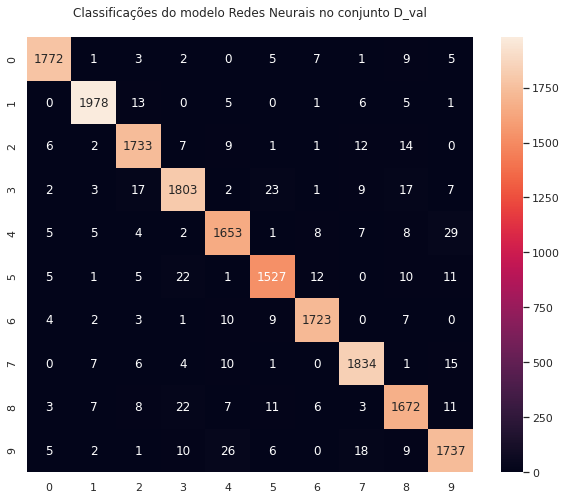

In [26]:
sns.set(rc={'figure.figsize':(10,8)})
plt.title(f"Classificações do modelo Redes Neurais no conjunto D_val\n")
sns.heatmap(metrics.confusion_matrix(D_y_val, neural_predictions), annot=True, fmt='g')
plt.show()

## Rodando o teste com $D_{val}$ para Support Vector Machines com os melhores parâmetros

In [ ]:
%%time

supervm = make_pipeline(StandardScaler(), SVC(C=10, decision_function_shape='ovo', kernel='poly', tol=0.0001))

print('Parâmetros:') # imprime os hiperparametros!
pprint(supervm.get_params())

supervm.fit(D_train, D_y_train)

print(f'Score: {supervm.score(D_train, D_y_train)}')

supervm_predictions = supervm.predict(D_val) 
print(classification_report(D_y_val, supervm_predictions)) 

Parâmetros:
{'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
           ('svc',
            SVC(C=10, decision_function_shape='ovo', kernel='poly', tol=0.0001))],
 'svc': SVC(C=10, decision_function_shape='ovo', kernel='poly', tol=0.0001),
 'svc__C': 10,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovo',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'poly',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.0001,
 'svc__verbose': False,
 'verbose': False}
Score: 0.9959285714285714


In [28]:
wrong = 0
right = 0
inputs = D_val
labels = D_y_val
for input, prediction, label in zip(inputs, supervm_predictions, labels):
    if prediction != label:
        wrong = wrong + 1
    else:
        right += 1
    
print(f"\nO modelo teve {wrong} predições incorretas e {right} predições corretas\n",
      f"Assim, possui precisão de {right/(wrong+right):.2f}%\n")


O modelo teve 515 predições incorretas e 17485 predições corretas
 Assim, possui precisão de 0.97%



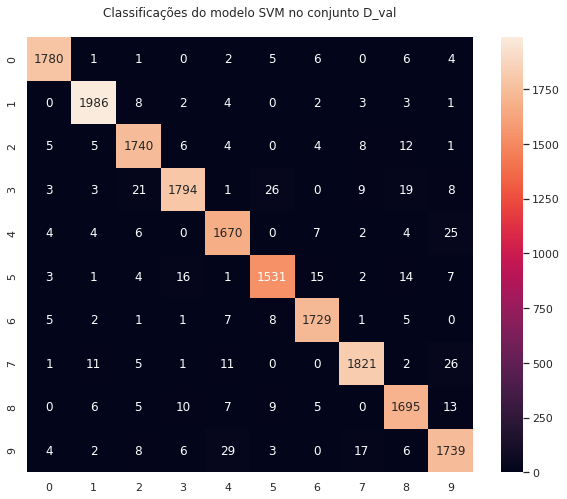

In [29]:
sns.set(rc={'figure.figsize':(10,8)})
plt.title(f"Classificações do modelo SVM no conjunto D_val\n")
sns.heatmap(metrics.confusion_matrix(D_y_val, supervm_predictions), annot=True, fmt='g')
plt.show()

Dados os scores com o treino com os melhores parâmetros, é possível concluir que o melhor modelo é dado por **Support Vector Machine**

# Estimação de Erro do modelo final
Temos o melhor modelo baseado no erro de validação. Estimamos sua performance.

In [30]:
best_model = supervm
print(f"Score do modelo: {best_model.score(X_test, y_test)}")

Score do modelo: 0.9696


In [31]:
best_model_predictions = best_model.predict(X_test)
print(classification_report(y_test, best_model_predictions)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.94      0.97      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [32]:
wrong = 0
right = 0

for input, prediction, label in zip(X_test, best_model_predictions, y_test):
    if prediction != label:
        wrong = wrong + 1
    else:
        right += 1
    
print(f"\nO modelo teve {wrong} predições incorretas e {right} predições corretas\n",
      f"Assim, possui precisão de {right/(wrong+right):.2f}%\n")


O modelo teve 304 predições incorretas e 9696 predições corretas
 Assim, possui precisão de 0.97%



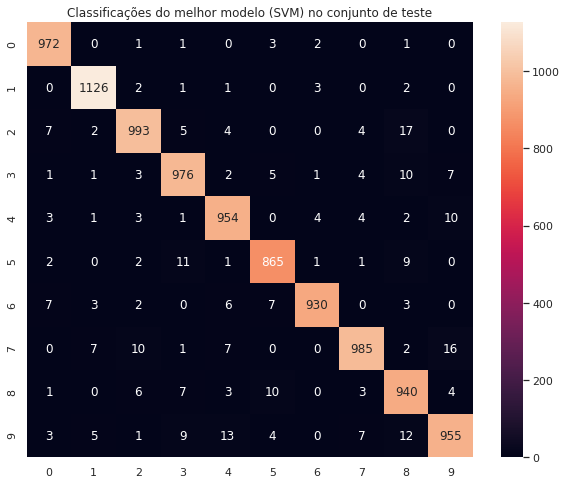

In [33]:
sns.set(rc={'figure.figsize':(10,8)})
plt.title(f"Classificações do melhor modelo (SVM) no conjunto de teste")
sns.heatmap(metrics.confusion_matrix(y_test, best_model_predictions), annot=True, fmt='g')
plt.show()

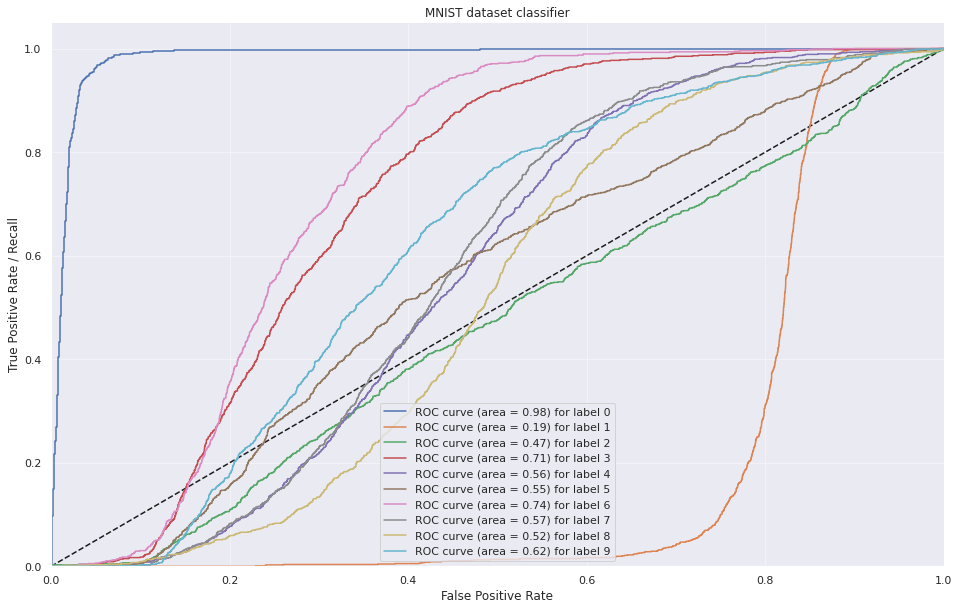

In [35]:
plot_multiclass_roc(best_model, X_test, y_test, n_classes=10, figsize=(16, 10))

In [34]:
# https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate / Recall')
    ax.set_title('MNIST dataset classifier')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# Considerações Finais

Texto texto